Fernanda Martin del Campo Gómez **741359**
– Paulina Elizabeth Mejia Hori **739553**
– Jeanette Valenzuela Gutierrez **739825**

# Proyecto 3: Modelo de ahorro

### Objetivos
#### General:
Mediante el uso de ecuaciones diferenciales, encontrar los valores deseados de un modelo de ahorro.

#### Específico:
Utilizar teoría de ecuaciones diferenciales para llegar a una solución analítica de un modelo de ahorro, posterioirmente hacer uso de Scipy para simular y acelerar este proceso, comparando los resultados obtenidos.

## Problema:

Un negocio de ropa maneja recurrentemente diferentes títulos de crédito para realizar diersos pagos y tratos de la empresa. Entre todos estos títulos, se da cuenta que tiene un pagaré vencido que nunca pagó. 

Para no generar más problemas con el acreedor, decide pagar el pagaré de forma inmediata, para esto, debe saber el valor total del pagaré junto con la deuda. 

El pagaré fue firmado el 1 de marzo de 2020, por $550,000.00 a dos años.
Las tasas de interés acordadas son las siguientes:
- 6.50% de interés ordinario simple
- 9.50% de interés moratorio continuo

El negocio desea pagar el pagaré el 1 de noviembre de 2022.

## Modelo que representa el problema:

Primeramente, tenemos que definir el valor del pagaré al termino de la fecha pactada. 

El interés ordinario (interés dentro de la fecha pactada) es simple, por lo tanto se puede calcular directamente como un cambio porcentual. Dicha fórmula es la siguiente:

  $ C_{f} = C_{i}(1+\frac{r}{100}t) $

Donde:
- $C_{f}$ es el capital o valor final
- $C_{i}$ es el capital o valor inicial
- r es la tasa de interés
- t es el tiempo 

Sabiendo el valor vencido del pagaré, podemos calcular su valor actual tomando en cuenta los interés moratorios (fuera de la fecha pactada).

Al ser una tasa continua, podemos decir que la razón del crecimiento de nuestro capital a lo largo del tiempo es igual a nuestro capital por la tasa de interés.

$$\frac{dS}{dt} = r*S$$

Donde S es capital.

- Al despejar el capital de un solo lado, tenemos que: $\frac{dS}{S} = r*dt$

- Si integramos dicha ecuación para resolver las derivadas:  $\int \frac{dS}{S} = r* \int dt$

- Tenemos que: $\ln{S} = r * t + C$

- Al despejar para S (Capital final): $S = e^{rt}*e^C$

- Que es igual a:

$S = Ce^{rt}$

Donde:
- S es capital final
- C es capital inicial 
- r es la tasa de interés
- t es el tiempo

Si sabemos que el pagaré terminó el 1 de marzo de 2022 y quiere pagar el 1 de noviembre del mismo año, el periodo de los interés moratorios es de 8 meses. 

También si sabemos que la tasa anual moratoria es de 9.50%, entonces mensual sería: 

$Tasa = \frac{9.50\%}{12} = 0.7916\%$

Teniendo este modelo, podemos llevar a cabo la solución analítica y la solución numérica, para posteriormente comparar los resultados. 

## Solución del problema:

In [2]:
import numpy as np
import matplotlib.pyplot as pt
from scipy.integrate import odeint

In [11]:
def simple(t, Ci, r):
    return Ci*(1+(r*t)/100)

def continuo(t, C, r):
    return C*np.exp(r*t)

def continuo_num(S, t, r):
    return r*S

valor_vencido = simple(2, 550000, 0.065)
print("Valor vencido: " + str(valor_vencido))

r = (0.095/12)
t = np.linspace(0, 8, 500)

solucion_analitica = continuo(t, valor_vencido, r)
print("Solución analítica: " + str(solucion_analitica[-1]))

solucion_numerica = odeint(continuo_num, valor_vencido, t, args=(r, ))
print("Solución numérica: " + str(solucion_numerica[-1][0]))

Valor vencido: 550715.0
Solución analítica: 586721.7971076036
Solución numérica: 586721.7971324075


**Como podemos observar, si el pagaré se hubiera pagado en la fecha pactada, su valor vencido hubiera sido de $\$$550,715.00, sin embargo, al tener que pagar moratorios, su valor el 1 de noviembre de 2022 es de $\$$586,721.00**

**También, podemos observar que la solución numérica tuvo un resultado casi identico al analítico, haciendo su error practicamente mínimo.**

## Visualización de la solución:

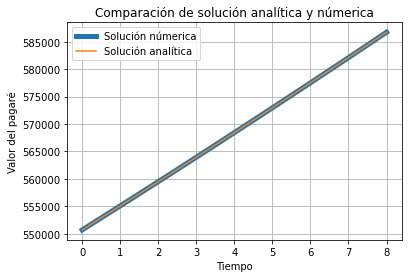

In [16]:
pt.figure()
pt.title("Comparación de solución analítica y númerica")
pt.ylabel("Valor del pagaré")
pt.xlabel("Tiempo")
pt.plot(t, solucion_numerica, lw=5, label="Solución númerica")
pt.plot(t, solucion_analitica, label="Solución analítica")
pt.legend()
pt.grid()

## Conclusiones:

En conclusión, se logró implementar el uso de herramientas tecnológicas para la resolución de problemas financieros; en este caso, se utilizó la librería "scipy" para la resolución de ecuaciones diferenciales, lo cual, como pudimos observar lleva a un resultado muuy similar al real y hace el proceso más rápido y eficaz.

## Referencias:

- Hernández, H. & Núñez, L. (2016, 18 enero). Matemáticas Avanzadas. halley.uis. https://halley.uis.edu.co/clases/lnunez/wp-content/uploads/2016/01/EcDifOrdinarias.pdf